---
#  Methane Pre-processing
---

In this notebook, we will read various dataset of global mean methane concentration that differ in observation frequency. The dataset will be combined together and will be interpolated to a yearly frequency if needed.

1. Read the data files
2. Plot the data to see how the concentration in the overlapping time period could be merged into one single observation dataframe.
  - From the plot, we can see that the observations and the various predictions can be combined with an interpolation with a polynomial of second degree between the end of the observation period up to 2040.
  - From the plot, we can see that the overlapping observations period of the two dataset of observations can be combined using by performing an interpolation  with a polynomial of third degree on the last five observations of the first observation dataset to match the first entry of the second observation dataset.
4. Performing the interpolation to create a continuous line for the methane concentration from 1850 to 2099.
5. Making sure that the results match well the uninterpolated dataset.
6. Writing the results to files

**Source :**

https://sealevel.info/co2_and_ch4.html

**Methane**

https://gml.noaa.gov/webdata/ccgg/trends/ch4/ch4_annmean_gl.txt

https://sealevel.info/EthCH498B.txt

**Forecast:**
https://gmd.copernicus.org/articles/13/3571/2020/

https://greenhousegases.science.unimelb.edu.au/#!/view




### Importing necessary libraries

In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

### Define files and variables

In [2]:
data_dir = '../data/GreenHouse_Gases/'

data_1850_1992 = 'ch4_1850-1992.txt' # Spaces separated

data_1984_2023 = 'ch4_annmean_gl.txt' # Spaces separated

out_dir = '../data/GreenHouse_Gases/processed/'

file_out_weak = 'ch4_1850-2099_SSP2_45.csv'
file_out_mod = 'ch4_1850-2099_SSP4_34.csv'
file_out_high = 'ch4_1850-2099_SSP4_60.csv'
file_out_xtrm = 'ch4_1850-2099_SSP5_85.csv'

start_year_fcst = 2040
end_year_fcst = 2099

file_fcst_weak = '../data/GreenHouse_Gases/SSP2-4.5_ModerateScenario.xlsx'
file_fcst_mod = '../data/GreenHouse_Gases/SSP4-34_WeakScenario.xlsx'
file_fcst_high = '../data/GreenHouse_Gases/SSP4-6.0_HighScenario.xlsx'
file_fcst_xtrm = '../data/GreenHouse_Gases/SSP5-8.5_ExtremeScenario.xlsx'

### Read the data files

In [3]:
fcst_weak = pd.read_excel(file_fcst_weak, skiprows=10)

fcst_weak = fcst_weak[fcst_weak['Year'] <= end_year_fcst]
fcst_weak['Year'] = pd.to_datetime(fcst_weak['Year'], format="%Y")
fcst_weak.drop(columns=['CO2'], inplace=True)
fcst_weak.set_index('Year', inplace=True)
fcst_weak

,CH4
Year,
2015-01-01,1841.942627
2016-01-01,1851.594116
2017-01-01,1873.799194
2018-01-01,1887.041016
2019-01-01,1899.410645
...,...
2095-01-01,1698.879883
2096-01-01,1695.429810
2097-01-01,1692.139893


In [4]:
fcst_mod = pd.read_excel(file_fcst_mod, skiprows=10)

fcst_mod = fcst_mod[fcst_mod['Year'] <= end_year_fcst]
fcst_mod['Year'] = pd.to_datetime(fcst_mod['Year'], format="%Y")
fcst_mod.drop(columns=['CO2'], inplace=True)
fcst_mod.set_index('Year', inplace=True)
fcst_mod

,CH4
Year,
2015-01-01,1841.921265
2016-01-01,1851.594238
2017-01-01,1875.319702
2018-01-01,1893.001587
2019-01-01,1912.561279
...,...
2095-01-01,2357.659912
2096-01-01,2353.679688
2097-01-01,2349.539795


In [5]:
fcst_high = pd.read_excel(file_fcst_high, skiprows=10)

fcst_high = fcst_high[fcst_high['Year'] <= end_year_fcst]
fcst_high['Year'] = pd.to_datetime(fcst_high['Year'], format="%Y")
fcst_high.drop(columns=['CO2'], inplace=True)
fcst_high.set_index('Year', inplace=True)
fcst_high

,CH4
Year,
2015-01-01,1841.922363
2016-01-01,1851.594238
2017-01-01,1875.319702
2018-01-01,1893.001587
2019-01-01,1912.561279
...,...
2095-01-01,2662.159912
2096-01-01,2658.899902
2097-01-01,2655.599854


In [6]:
fcst_xtrm = pd.read_excel(file_fcst_xtrm, skiprows=10)

fcst_xtrm = fcst_xtrm[fcst_xtrm['Year'] <= end_year_fcst]
fcst_xtrm['Year'] = pd.to_datetime(fcst_xtrm['Year'], format="%Y")
fcst_xtrm.drop(columns=['CO2'], inplace=True)
fcst_xtrm.set_index('Year', inplace=True)
fcst_xtrm

,CH4
Year,
2015-01-01,1841.947632
2016-01-01,1851.593994
2017-01-01,1873.519165
2018-01-01,1885.970947
2019-01-01,1897.060425
...,...
2095-01-01,2478.709473
2096-01-01,2465.519287
2097-01-01,2452.609375


In [7]:
obs_1850_1992 = pd.read_csv(os.path.join(data_dir, data_1850_1992), sep='\s+', skiprows=16)

obs_1850_1992['year'] = pd.to_datetime(obs_1850_1992['year'],  format="%Y")
obs_1850_1992.drop(columns=['2000A.D.'], inplace=True)
obs_1850_1992.set_index('year', inplace=True)
obs_1850_1992.rename_axis('Year', inplace=True)
obs_1850_1992.rename(columns={'MixR':'CH4'}, inplace=True)

obs_1850_1992

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3210743/1503376624.py:1: SyntaxWarning: invalid escape sequence '\s'
  obs_1850_1992 = pd.read_csv(os.path.join(data_dir, data_1850_1992), sep='\s+', skiprows=16)


,CH4
Year,
1850-01-01,791.6
1860-01-01,805.6
1870-01-01,821.0
1880-01-01,837.1
1890-01-01,856.6
1900-01-01,879.4
1902-01-01,887.9
1904-01-01,896.5
1906-01-01,905.3


In [8]:
obs_1984_2023 = pd.read_csv(os.path.join(data_dir, data_1984_2023), sep='\s+', skiprows=44)

obs_1984_2023['year'] = pd.to_datetime(obs_1984_2023['year'],  format="%Y")
obs_1984_2023.drop(columns=['unc'], inplace=True)
obs_1984_2023.set_index('year', inplace=True)
obs_1984_2023.rename_axis('Year', inplace=True)
obs_1984_2023.rename(columns={'mean':'CH4'}, inplace=True)

obs_1984_2023

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3210743/78894350.py:1: SyntaxWarning: invalid escape sequence '\s'
  obs_1984_2023 = pd.read_csv(os.path.join(data_dir, data_1984_2023), sep='\s+', skiprows=44)


,CH4
Year,
1984-01-01,1644.84
1985-01-01,1657.29
1986-01-01,1670.09
1987-01-01,1682.70
1988-01-01,1693.21
1989-01-01,1704.52
1990-01-01,1714.47
1991-01-01,1724.76
1992-01-01,1735.48


### Plot the data

In [9]:
start_obs2 = obs_1984_2023.index.min()
end_obs2 = obs_1984_2023.index.max()

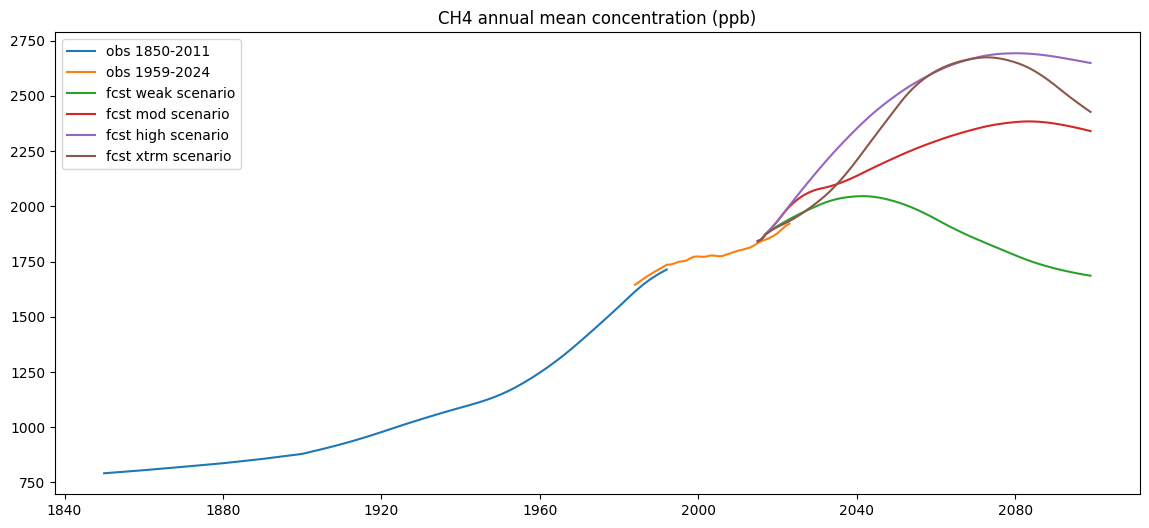

In [10]:
fig = plt.figure(figsize=(14,6))

ax = plt.plot(obs_1850_1992.index, obs_1850_1992['CH4'], label='obs 1850-2011')
ax = plt.plot(obs_1984_2023.index, obs_1984_2023['CH4'], label='obs 1959-2024')
ax = plt.plot(fcst_weak.index, fcst_weak['CH4'], label='fcst weak scenario')
ax = plt.plot(fcst_mod.index, fcst_mod['CH4'], label='fcst mod scenario')
ax = plt.plot(fcst_high.index, fcst_high['CH4'], label='fcst high scenario')
ax = plt.plot(fcst_xtrm.index, fcst_xtrm['CH4'], label='fcst xtrm scenario')

plt.title('CH4 annual mean concentration (ppb)')

plt.legend()

plt.show()

### Adjust the start of the forecast to match the end of the monitoring observation 

In [11]:
fcst_weak = pd.concat([ obs_1984_2023.iloc[-1:], fcst_weak[fcst_weak.index >= pd.to_datetime(start_year_fcst, format='%Y')]])
fcst_weak = fcst_weak.resample('YS').interpolate(method='polynomial', order=2)
fcst_weak

,CH4
Year,
2023-01-01,1921.700000
2024-01-01,1934.802141
2025-01-01,1947.208593
2026-01-01,1958.851560
2027-01-01,1969.765938
...,...
2095-01-01,1698.879883
2096-01-01,1695.429810
2097-01-01,1692.139893


In [12]:
fcst_mod = pd.concat([ obs_1984_2023.iloc[-1:], fcst_mod[fcst_mod.index >= pd.to_datetime(start_year_fcst, format='%Y')]])
fcst_mod = fcst_mod.resample('YS').interpolate(method='polynomial', order=2)
fcst_mod

,CH4
Year,
2023-01-01,1921.700000
2024-01-01,1937.981850
2025-01-01,1953.861413
2026-01-01,1969.251914
2027-01-01,1984.197350
...,...
2095-01-01,2357.659912
2096-01-01,2353.679688
2097-01-01,2349.539795


In [13]:
fcst_high = pd.concat([ obs_1984_2023.iloc[-1:], fcst_high[fcst_high.index >= pd.to_datetime(start_year_fcst, format='%Y')]])
fcst_high = fcst_high.resample('YS').interpolate(method='polynomial', order=2)
fcst_high

,CH4
Year,
2023-01-01,1921.700000
2024-01-01,1954.025378
2025-01-01,1985.560821
2026-01-01,2016.134005
2027-01-01,2045.832289
...,...
2095-01-01,2662.159912
2096-01-01,2658.899902
2097-01-01,2655.599854


In [14]:
fcst_xtrm = pd.concat([ obs_1984_2023.iloc[-1:], fcst_xtrm[fcst_xtrm.index >= pd.to_datetime(start_year_fcst, format='%Y')]])
fcst_xtrm = fcst_xtrm.resample('YS').interpolate(method='polynomial', order=2)
fcst_xtrm

,CH4
Year,
2023-01-01,1921.700000
2024-01-01,1932.405026
2025-01-01,1943.914755
2026-01-01,1956.166294
2027-01-01,1969.190030
...,...
2095-01-01,2478.709473
2096-01-01,2465.519287
2097-01-01,2452.609375


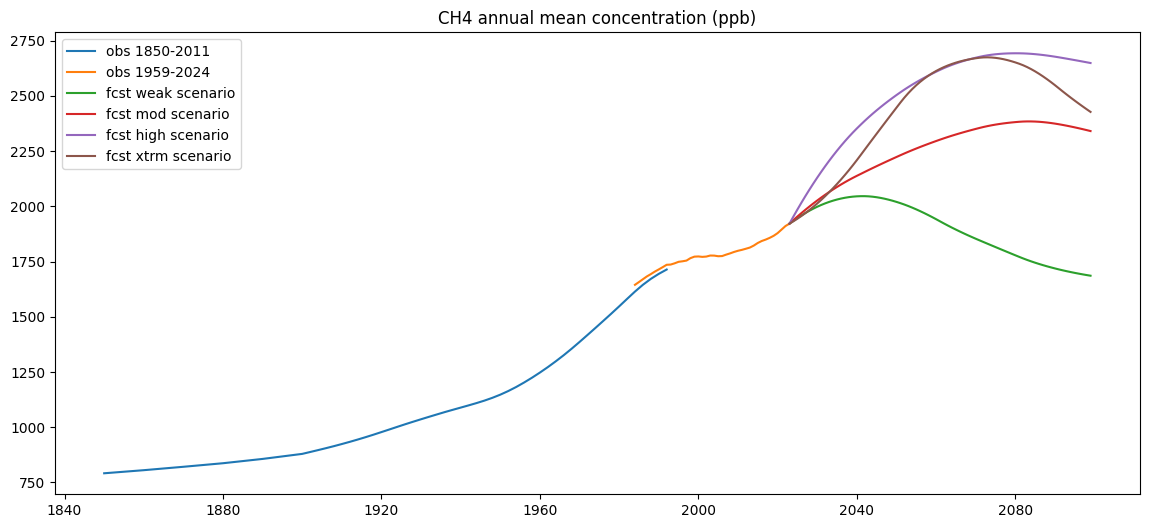

In [15]:
fig = plt.figure(figsize=(14,6))

ax = plt.plot(obs_1850_1992.index, obs_1850_1992['CH4'], label='obs 1850-2011')
ax = plt.plot(obs_1984_2023.index, obs_1984_2023['CH4'], label='obs 1959-2024')
ax = plt.plot(fcst_weak.index, fcst_weak['CH4'], label='fcst weak scenario')
ax = plt.plot(fcst_mod.index, fcst_mod['CH4'], label='fcst mod scenario')
ax = plt.plot(fcst_high.index, fcst_high['CH4'], label='fcst high scenario')
ax = plt.plot(fcst_xtrm.index, fcst_xtrm['CH4'], label='fcst xtrm scenario')

plt.title('CH4 annual mean concentration (ppb)')

plt.legend()

plt.show()

### Adjust the end of ice core observations to match the start of the monitoring observations

In [16]:
obs_1850_1992 = obs_1850_1992[obs_1850_1992.index < start_obs2]

obs_1850_1992 = pd.concat([obs_1850_1992.iloc[0:-5], obs_1984_2023.iloc[:1]])
obs_1850_1992 = obs_1850_1992.resample('YS').interpolate(method='polynomial', order=3)
obs_1850_1992

,CH4
Year,
1850-01-01,791.600000
1851-01-01,792.859068
1852-01-01,794.156502
1853-01-01,795.493289
1854-01-01,796.859405
...,...
1980-01-01,1558.849030
1981-01-01,1579.184507
1982-01-01,1600.230966


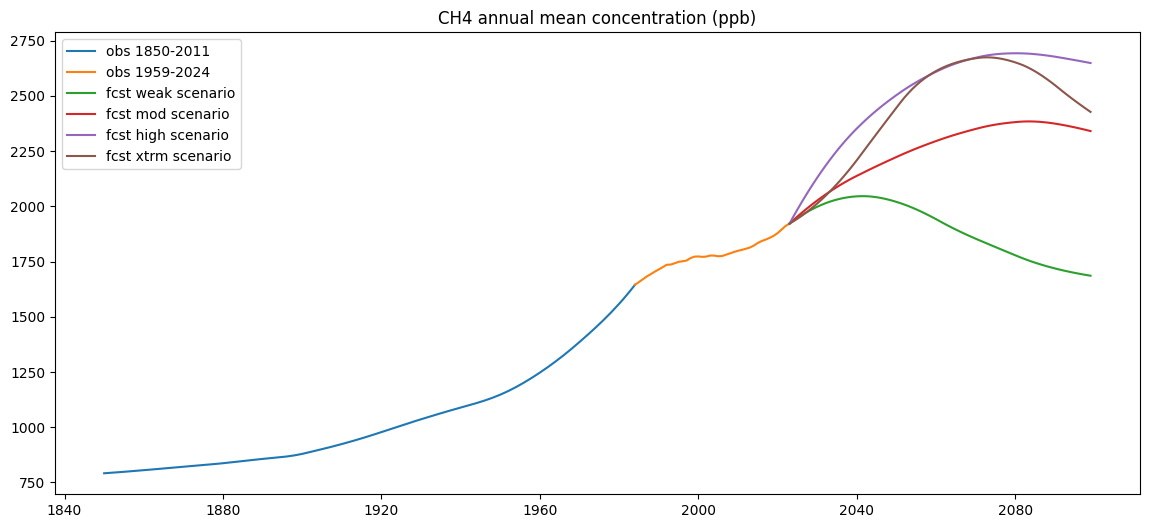

In [17]:
fig = plt.figure(figsize=(14,6))

ax = plt.plot(obs_1850_1992.index, obs_1850_1992['CH4'], label='obs 1850-2011')
ax = plt.plot(obs_1984_2023.index, obs_1984_2023['CH4'], label='obs 1959-2024')
ax = plt.plot(fcst_weak.index, fcst_weak['CH4'], label='fcst weak scenario')
ax = plt.plot(fcst_mod.index, fcst_mod['CH4'], label='fcst mod scenario')
ax = plt.plot(fcst_high.index, fcst_high['CH4'], label='fcst high scenario')
ax = plt.plot(fcst_xtrm.index, fcst_xtrm['CH4'], label='fcst xtrm scenario')

plt.title('CH4 annual mean concentration (ppb)')

plt.legend()

plt.show()

### Creating a dataframe that contains observations and the forecast data

In [18]:
full_weak_df = pd.concat([obs_1850_1992[obs_1850_1992.index < start_obs2], obs_1984_2023, fcst_weak[fcst_weak.index > end_obs2]])
full_mod_df = pd.concat([obs_1850_1992[obs_1850_1992.index < start_obs2], obs_1984_2023, fcst_mod[fcst_mod.index > end_obs2]])
full_high_df = pd.concat([obs_1850_1992[obs_1850_1992.index < start_obs2], obs_1984_2023, fcst_high[fcst_high.index > end_obs2]])
full_xtrm_df = pd.concat([obs_1850_1992[obs_1850_1992.index < start_obs2], obs_1984_2023, fcst_xtrm[fcst_xtrm.index > end_obs2]])

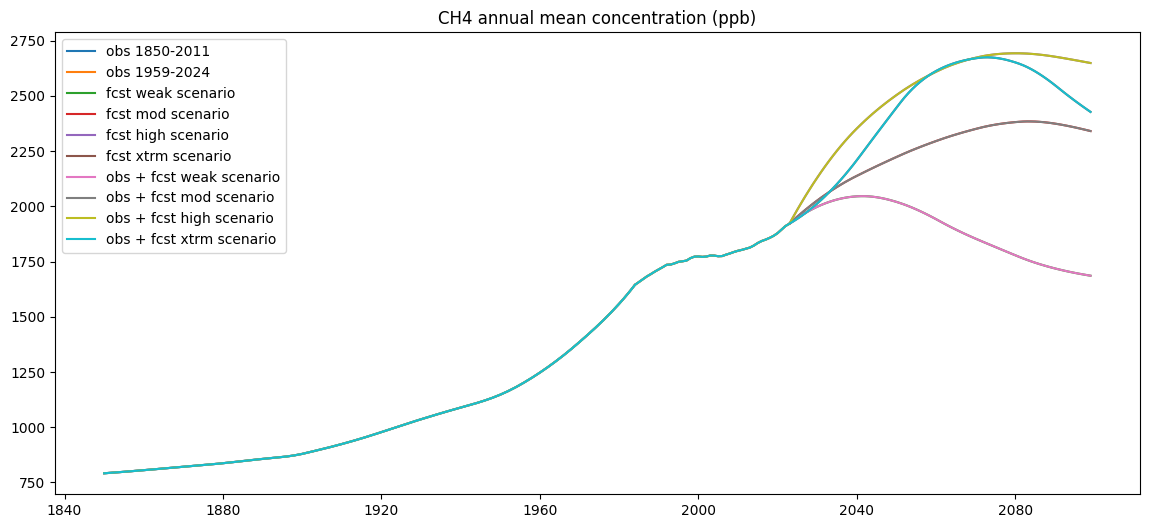

In [19]:
fig = plt.figure(figsize=(14,6))

ax = plt.plot(obs_1850_1992.index, obs_1850_1992['CH4'], label='obs 1850-2011')
ax = plt.plot(obs_1984_2023.index, obs_1984_2023['CH4'], label='obs 1959-2024')
ax = plt.plot(fcst_weak.index, fcst_weak['CH4'], label='fcst weak scenario')
ax = plt.plot(fcst_mod.index, fcst_mod['CH4'], label='fcst mod scenario')
ax = plt.plot(fcst_high.index, fcst_high['CH4'], label='fcst high scenario')
ax = plt.plot(fcst_xtrm.index, fcst_xtrm['CH4'], label='fcst xtrm scenario')

ax = plt.plot(full_weak_df.index, full_weak_df['CH4'], label='obs + fcst weak scenario')
ax = plt.plot(full_mod_df.index, full_mod_df['CH4'], label='obs + fcst mod scenario')
ax = plt.plot(full_high_df.index, full_high_df['CH4'], label='obs + fcst high scenario')
ax = plt.plot(full_xtrm_df.index, full_xtrm_df['CH4'], label='obs + fcst xtrm scenario')

plt.title('CH4 annual mean concentration (ppb)')

plt.legend()

plt.show()

### Write data to file

In [20]:
full_weak_df.to_csv(os.path.join(out_dir, file_out_weak))
full_mod_df.to_csv(os.path.join(out_dir, file_out_mod))
full_high_df.to_csv(os.path.join(out_dir, file_out_high))
full_xtrm_df.to_csv(os.path.join(out_dir, file_out_xtrm))